# Data Visualization Project

## Name : Syed Muhammed Umair
## ID : 20181CSE0734
## Section : 11 
## Batch : G2 B2 

### Importing All Packages

Import All Requied Libraries and Link Github Dataset Repo

In [353]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
baseUrl = 'https://raw.githubusercontent.com/umairrsyedd/finance_d3/main/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Inflation

In [354]:
# Load Dataset
url = baseUrl + 'Datasets/Inflation/inflation_consumer_prices.csv'
df_inflation = pd.read_csv(url, sep=",", encoding='cp1252')

In [355]:
# Drop All Rows except India 107th Row
df_inflation = df_inflation.iloc[[107] , :]

In [356]:
# Drop All Unecessary Columns
df_inflation.drop(df_inflation.columns[[0,1,2,3]],axis=1,inplace = True)
# Transpose Dataset
# df_inflation = df_inflation.T

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


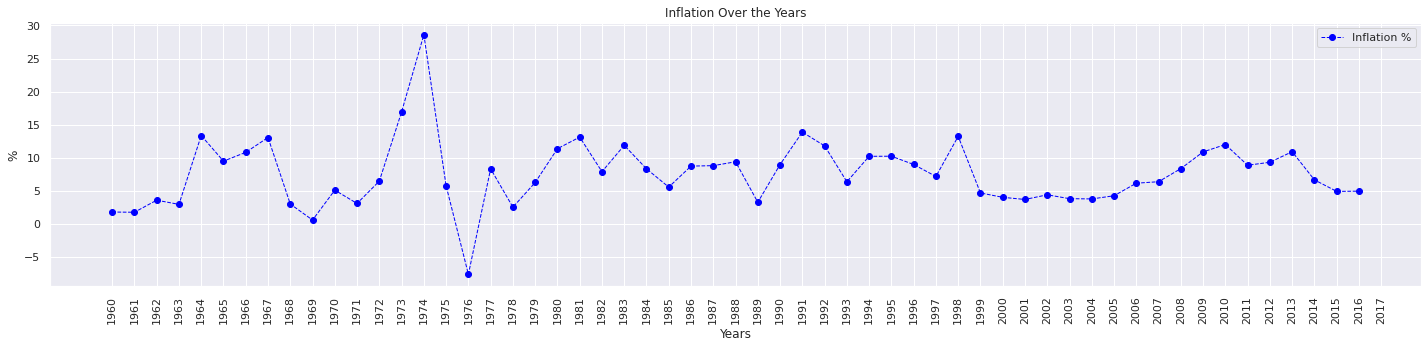

In [357]:
data = df_inflation.iloc[0]
years = df_inflation.columns
plt.figure(figsize=(20,5))
plt.plot( years,data, color='blue', linestyle='--', marker='o', linewidth= '1' ,label='Inflation %'),
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("%")
plt.title("Inflation Over the Years")
plt.legend(loc=0)
plt.show()

In [358]:
# Remove Years because of High Inflation Rate Up's and Down's and Start with the 21st Century
for i in range(40):
        del df_inflation[df_inflation.columns.values[0]]

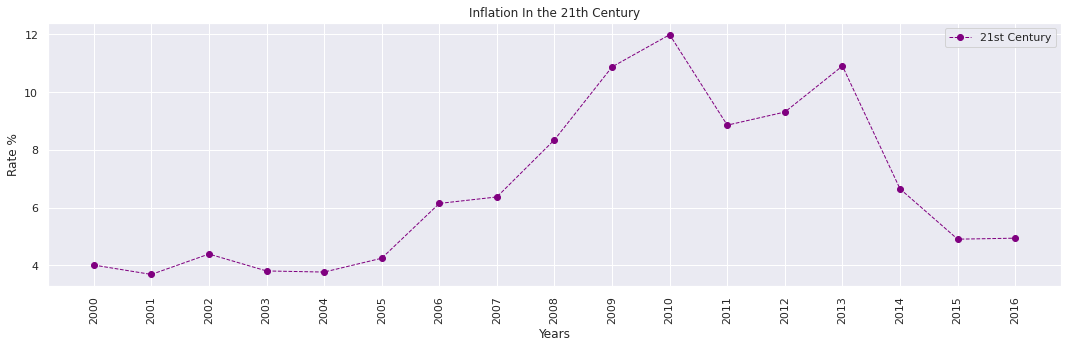

In [359]:
# Plot Updated Graph
data = df_inflation.iloc[0]
years = df_inflation.columns
plt.figure(figsize=(15,5))
plt.plot( years,data, color='purple', linestyle='--', marker='o', linewidth= '1' , label="21st Century"),
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Rate %")
plt.title("Inflation In the 21th Century")
plt.legend(loc=0)
plt.show()

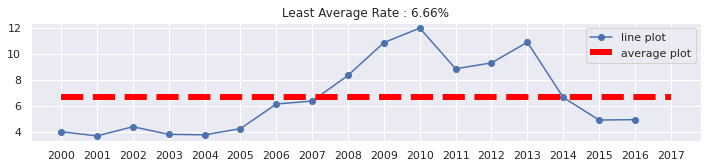

In [360]:
# Calculate Minimum Average Inflation Rate in the 21st Century
data = df_inflation.iloc[0]
years = df_inflation.columns
plt.rcParams["figure.figsize"] = [10, 2.5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.plot(years, data, 'o-', label='line plot')
y_avg = [np.mean(data)] * len(data)
ax.plot(years, y_avg, color='red', lw=6, ls='--', label="average plot")
plt.legend(loc=0)
average_inflation = str(round(y_avg[1],3))
plt.title("Least Average Rate : " + average_inflation + "%") 
plt.show()

Enter How Much Money: 12500
Enter How Many Years? 4


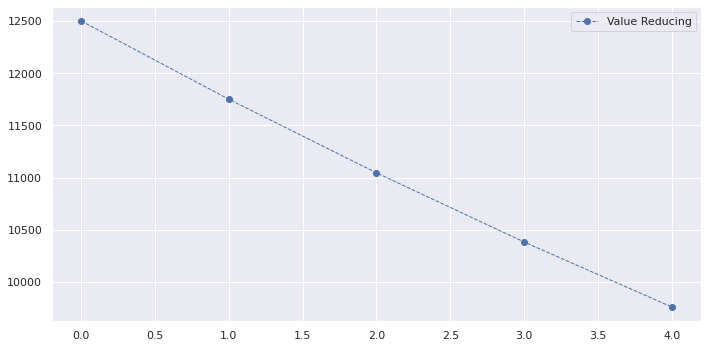

Actual Money You Are Left with  ₹9759.4(End Of 5 Years)


In [361]:
amount = float(input("Enter How Much Money: "))
years = float(input("Enter How Many Years? "))
yearsArray = np.arange(1,years+1)
value = [amount]
currentValue = amount
for i in yearsArray:
  currentValue = currentValue - (currentValue * 0.06)
  value.append(round(currentValue,3))
plt.figure(figsize=(10,5))
plt.plot(value,linestyle='--', marker='o', linewidth= '1', label="Value Reducing")
plt.legend(loc=0)
plt.show()
print("Actual Money You Are Left with  ₹" + str(round(value[len(value) -1],1)) + "(End Of 5 Years)")

##Gold Rates

In [362]:
# Read Dataset from Gdrive
df_gold = pd.read_excel('/content/drive/My Drive/DataVisualization_Project/Gold_Prices.xlsx')

In [363]:
# Drop all Unecessary Countries
df_gold.drop(df_gold.columns[[1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]], axis = 1, inplace = True)
# Remove Nan 
df_gold.dropna(subset = ["Indian rupee"], inplace=True)

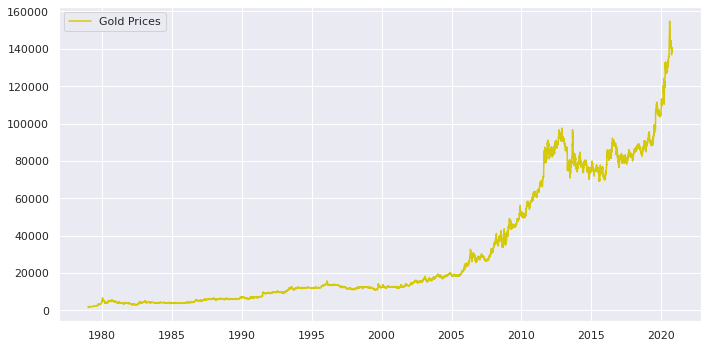

In [364]:
# Plot Data
a = df_gold['Name']
b = df_gold['Indian rupee']
plt.figure(figsize=(10,5))
plt.plot(a,b, label="Gold Prices", color='#D5C90C')
plt.legend(loc=0)
plt.show()

In [365]:
# Removing Monthly Data In Random Order
df_gold = df_gold[df_gold.index % 150 == 0]

In [366]:
# Reset Index
df_gold = df_gold.reset_index()

In [367]:
# df_gold["Indian rupee"]
a_list = df_gold["Indian rupee"]
print(a_list)

0       2367.26
1       5138.14
2       5231.27
3       3967.80
4       3753.99
        ...    
67     85285.10
68     85285.25
69     89738.82
70    107303.59
71    131671.80
Name: Indian rupee, Length: 72, dtype: float64


In [368]:
# Calculate Average Gold Increase
a_list = df_gold["Indian rupee"]
average_gold = []
for index, elem in enumerate(a_list):
    if (index+1 < len(a_list ) and index - 1 >= 0):
        curr_el = elem
        next_el = a_list[index+1]
        temp = (abs((next_el - curr_el)) / curr_el) * 100
        average_gold.append(temp)
# print(average_gold)
def Average(lst):
    return sum(lst) / len(lst)
average_gold_percent = Average(average_gold)
print(average_gold_percent)


10.078466435463406


In [369]:
print(df_gold['Name'])

0    1979-07-27
1    1980-02-22
2    1980-09-19
3    1981-04-17
4    1981-11-13
        ...    
67   2018-02-02
68   2018-08-31
69   2019-03-29
70   2019-10-25
71   2020-05-22
Name: Name, Length: 72, dtype: datetime64[ns]


In [370]:
# Cleaning Data
g_data = average_gold
g_years = df_gold['Name']
g_years.pop(0)
g_years.pop(1)

Timestamp('1980-02-22 00:00:00')

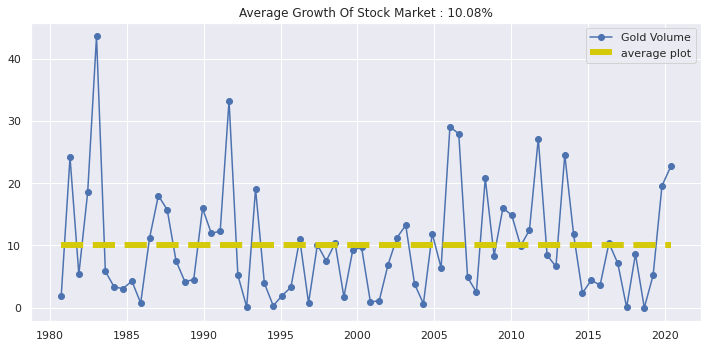

In [371]:
# Calculate Minimum Average Gold Returns
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.plot(g_years, g_data, 'o-', label='Gold Volume')
g_avg = [10.08 for i in range(70)] 
ax.plot(g_years, g_avg, color='#D5C90C', lw=6, ls='--', label="average plot")
plt.legend(loc=0)
to_show_average = str(round(average_gold_percent,2))
plt.title("Average Growth Of Stock Market : " + to_show_average + "%") 
plt.show()

## Stock Market - Sensex

In [372]:
# Load Dataset
url = baseUrl+'Datasets/Sensex/Sensex%20(2001-2020).csv'
df_sensex = pd.read_csv(url)

In [373]:
# Drop All Unecessary Columns
df_sensex.drop(df_sensex.columns[[1,3,4,5,6]],axis=1,inplace = True)


In [374]:
# Data too Large ~5000, Drop one in every 80 rows to get random accurate data
df_sensex = df_sensex[df_sensex.index % 80 == 0]

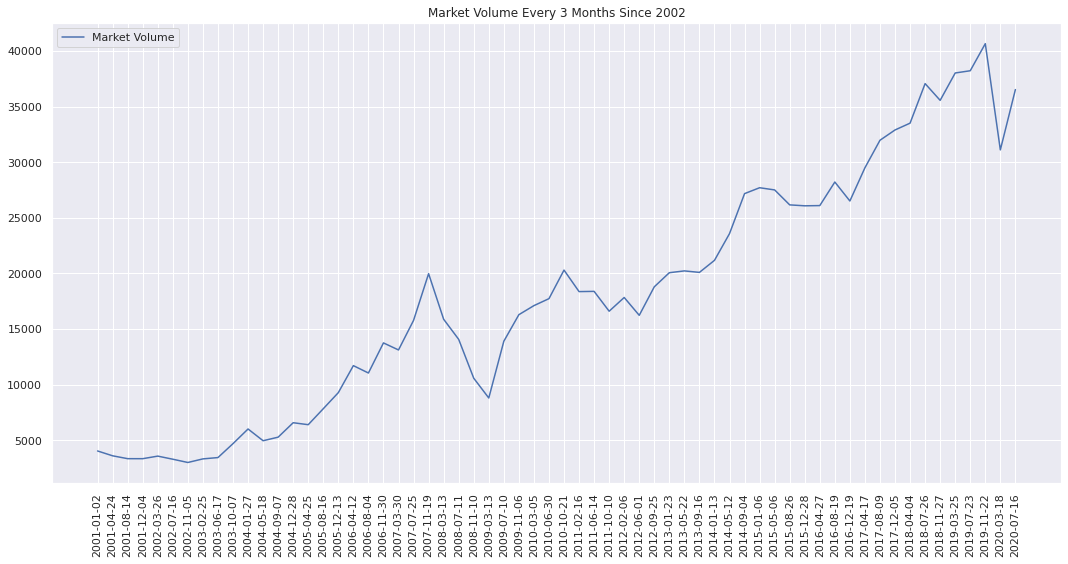

In [375]:
# Plot Data
a = df_sensex['Date']
b = df_sensex['High']
plt.figure(figsize=(15,8))
plt.plot(a,b, label="Market Volume")
plt.xticks(rotation=90)
plt.title("Market Volume Every 3 Months Since 2002")
plt.legend(loc=0)
plt.show()

In [376]:
# Getting Only Yearly Data
df_sensex = df_sensex[df_sensex.index % 3 == 0]

In [377]:
# Remove Unecessary Year Data
df_sensex = df_sensex.drop(0)


In [378]:
# Reset Index
df_sensex = df_sensex.reset_index()

In [379]:
# Finding the Average Increase Per Year In The Stock Market
a_list = df_sensex['High']
average_sensex = []
for index, elem in enumerate(a_list):
    if (index+1 < len(a_list) and index - 1 >= 0):
        prev_el = a_list[index-1]
        curr_el = elem
        next_el = a_list[index+1]
        temp = ((next_el - curr_el) / curr_el) * 100
        average_sensex.append(temp)
def Average(lst):
    return sum(lst) / len(lst)
average_sensex_percent = Average(average_sensex)

In [380]:
# Get All Dates in Seperate List
sensex_date = []
s1 = slice(4)
for i in df_sensex['Date']:
  sensex_date.append(int(i[s1]))


In [381]:
# Remove Unwanted Date
sensex_date.pop()
sensex_date.pop()

2019

In [382]:
print(sensex_date)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


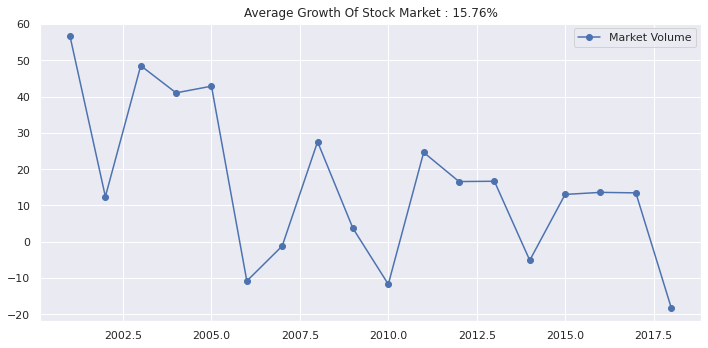

In [383]:
# Calculate Minimum Average Sensex Returns
s_data = average_sensex
s_years = sensex_date
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.plot(s_years, s_data, 'o-', label='Market Volume')
plt.legend(loc=0)
to_show_average = str(round(average_sensex_percent,2))
plt.title("Average Growth Of Stock Market : " + to_show_average + "%") 
plt.show()

##Crypto Currency

In [384]:
# Load Dataset from Github
url = baseUrl + 'Datasets/Bitcoin/BTC-USD.csv'
df_Bitcoin = pd.read_csv(url)
df_Bitcoin.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [385]:
# Drop Unecessary Columns
df_Bitcoin.drop(df_Bitcoin.columns[[1,3,4,5,6]], axis = 1, inplace = True)
df_Bitcoin.head()

,Date,High
0,2014-09-17,468.174011
1,2014-09-18,456.859985
2,2014-09-19,427.834991
3,2014-09-20,423.295990
4,2014-09-21,412.425995


In [386]:
df_Bitcoin.count

<bound method DataFrame.count of             Date          High
0     2014-09-17    468.174011
1     2014-09-18    456.859985
2     2014-09-19    427.834991
3     2014-09-20    423.295990
4     2014-09-21    412.425995
...          ...           ...
2646  2021-12-15  49473.957031
2647  2021-12-16  49425.574219
2648  2021-12-17  48004.894531
2649  2021-12-18  47313.828125
2650  2021-12-19  47973.355469

[2651 rows x 2 columns]>

In [387]:
# Plot Data
# HUGE DATASET Takes Forever to Execute 
# a = df_Bitcoin['Date']
# b = df_Bitcoin['High']
# plt.figure(figsize=(15,8))
# plt.xticks(rotation=90)
# plt.plot(a,b,label='Bitcoin Value')
# plt.show()

In [388]:
# Clean Data and Take Every 3 Months Frequency
df_Bitcoin = df_Bitcoin[df_Bitcoin.index % 50 == 0]

In [389]:
# Reset Index
df_Bitcoin = df_Bitcoin.reset_index()

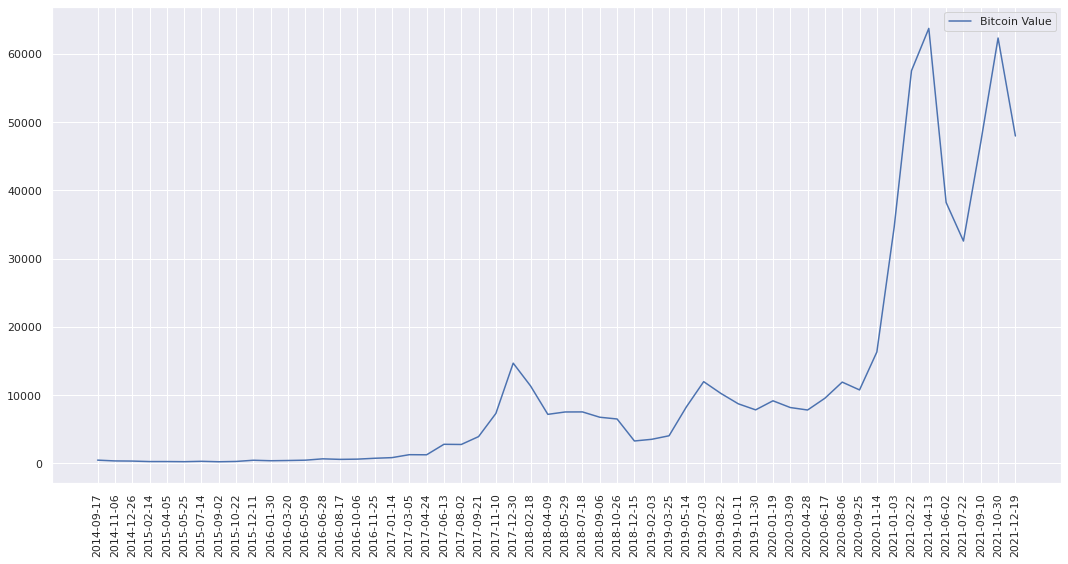

In [390]:
# Plot Modified Data
a = df_Bitcoin['Date']
b = df_Bitcoin['High']
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.plot(a,b,label='Bitcoin Value')
plt.legend(loc=0)
plt.show()

In [391]:
# Finding the Average Increase Per Year In The Stock Market From Start
a_list = df_Bitcoin['High'] 
average_bitcoin = []
for index, elem in enumerate(a_list):
    if (index+1 < len(a_list) and index - 1 >= 0):
        prev_el = a_list[index-1]
        curr_el = elem
        next_el = a_list[index+1]
        temp = ((next_el - curr_el) / curr_el) * 100
        average_bitcoin.append(temp)
def Average(lst):
    return sum(lst) / len(lst)
average_bitcoin_percent = Average(average_bitcoin)
average_bitcoin_percent

15.734477956178868

In [392]:
df_Bitcoin = df_Bitcoin.iloc[30:]


In [393]:
df_Bitcoin = df_Bitcoin.reset_index()

In [394]:
# Finding the Average Increase Per Year In The Stock Market From Start
a_list = df_Bitcoin['High'] 
average_bitcoin = []
for index, elem in enumerate(a_list):
    if (index+1 < len(a_list) and index - 1 >= 0):
        prev_el = a_list[index-1]
        curr_el = elem
        next_el = a_list[index+1]
        temp = ((next_el - curr_el) / curr_el) * 100
        average_bitcoin.append(temp)
def Average(lst):
    return sum(lst) / len(lst)
average_bitcoin_percent = Average(average_bitcoin)
average_bitcoin_percent

18.68574434428314

In [395]:
b_data = average_bitcoin
b_years = df_Bitcoin['Date']
b_years.pop(0)
b_years.pop(1)

'2018-12-15'

Bitcoin Giving an Average 18% Every 3 Months from the last 2 years


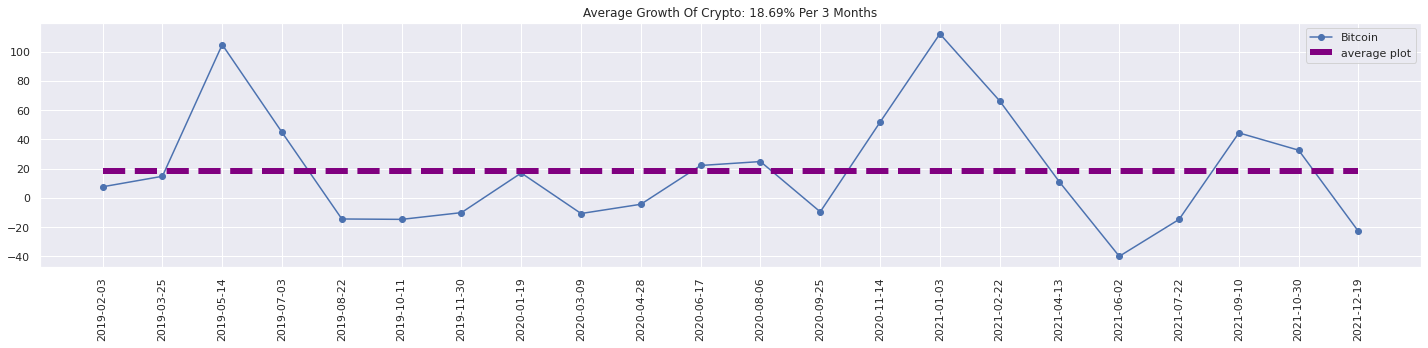

In [396]:
# Calculate Minimum Average Bitcoin Returns

plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.plot(b_years, b_data, 'o-', label='Bitcoin')

b_avg = [18 for i in range(22)] 
plt.xticks(rotation=90)
ax.plot(b_years, b_avg, color='purple', lw=6, ls='--', label="average plot")
plt.legend(loc=0) 
to_show_average = str(round(average_bitcoin_percent,2))
plt.title("Average Growth Of Crypto: " + to_show_average + "% Per 3 Months") 
plt.show()

## Comparison

In [397]:
# Converting all the Data Types to Integers from Numpy Float
# .item() property
average_sensex_percent = int(average_sensex_percent)

average_gold_percent = int(average_gold_percent)

average_bitcoin_percent = int(average_bitcoin_percent)

average_inflation = float(average_inflation)


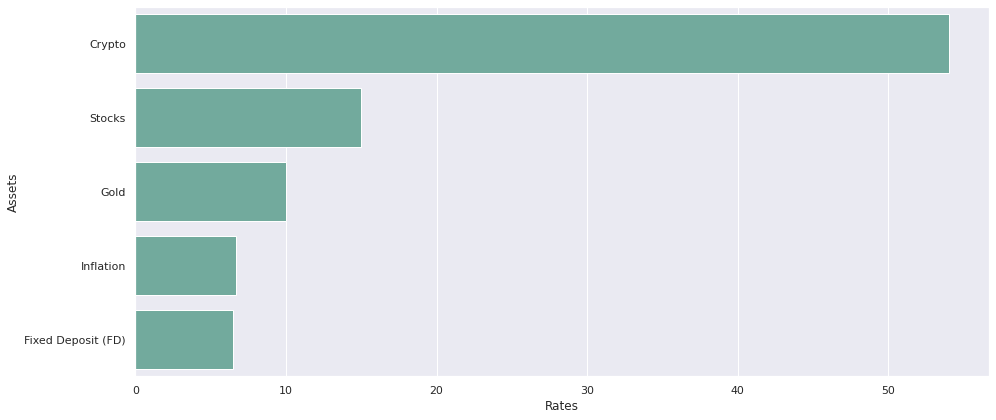

In [398]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x = [], 
df = pd.DataFrame({
        'Assets': ['Inflation', 'Gold' , 'Stocks' , 'Crypto', "Fixed Deposit (FD)" ],
        'Rates': [average_inflation, average_gold_percent, average_sensex_percent, average_bitcoin_percent*3, 6.5]
})

# Set the figure size
plt.figure(figsize=(14, 6))

# Reorder this data frame
df = df.sort_values(['Rates'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    x="Rates", 
    y="Assets", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

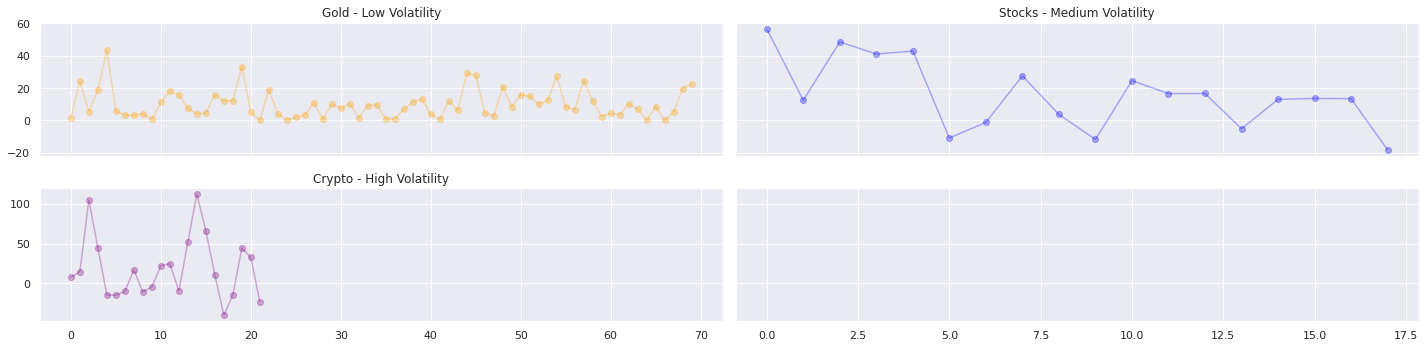

In [399]:
# libraries and data
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
a = np.arange(0,18)
b = np.arange(0,70)
c = np.arange(0,22)
 # Create subplots
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
ax[0][0].plot( b, g_data,  marker='o', color="orange", alpha=0.3)
ax[0][1].plot( a, s_data,  marker='o', color="blue", alpha=0.3)
ax[1][0].plot( c, b_data,  marker='o', color="purple", alpha=0.3)
ax[0][0].set_title('Gold - Low Volatility')
ax[0][1].set_title('Stocks - Medium Volatility')
ax[1][0].set_title('Crypto - High Volatility')
# Show the graph
plt.show()

##Recommended Portfolio for 20 - 30 Year Olds

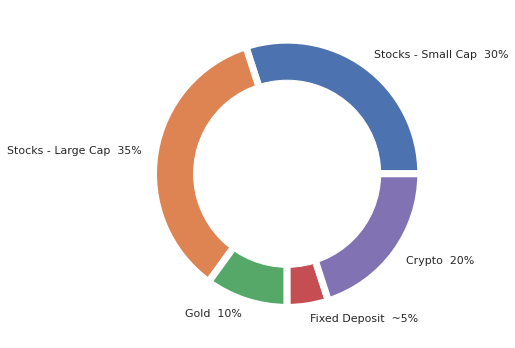

In [400]:
import matplotlib.pyplot as plt

# create data
names = ['Stocks - Small Cap  30%','Stocks - Large Cap  35%', 'Gold  10%', 'Fixed Deposit  ~5%', 'Crypto  20%']
size = [30,35,10,5,20]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Project End

Datasets

https://github.com/umairrsyedd/finance_d3.git


References 

https://www.python-graph-gallery.com/
https://www.w3schools.com/python/matplotlib_subplots.asp


